<a href="https://colab.research.google.com/github/romo05/fraud-detection/blob/main/fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip dataset and store it in notebook

In [ ]:
!unzip /content/drive/MyDrive/Unified_Mentor_Projects/Fraud_Detection/dataset.zip -d /content/dataset

Archive:  /content/drive/MyDrive/Unified_Mentor_Projects/Fraud_Detection/dataset.zip
replace /content/dataset/data/2018-04-01.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Checking if all folders are present

In [ ]:
import os
base_dir = '/content/dataset/data'
len(os.listdir(base_dir))

183

Load and combine all pickle files

In [ ]:
import pandas as pd

folder_path = '/content/dataset/data'

# Load all .pkl files
all_files = []
for file in os.listdir(folder_path):
  if file.endswith('.pkl'):
    df = pd.read_pickle(os.path.join(folder_path, file))
    all_files.append(df)

df = pd.concat(all_files, ignore_index=True)
df.head(50)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,959229,2018-07-10 00:00:04,1563,3749,30.59,8640004,100,0,0
1,959230,2018-07-10 00:02:07,2850,1003,66.45,8640127,100,0,0
2,959231,2018-07-10 00:02:31,4464,4640,73.40,8640151,100,0,0
3,959232,2018-07-10 00:02:40,4094,871,94.37,8640160,100,0,0
4,959233,2018-07-10 00:03:25,2721,9820,8.89,8640205,100,0,0
5,959234,2018-07-10 00:03:33,2227,1883,49.99,8640213,100,0,0
6,959235,2018-07-10 00:04:56,1070,8918,52.58,8640296,100,0,0
7,959236,2018-07-10 00:05:42,2555,8089,50.85,8640342,100,0,0
8,959237,2018-07-10 00:06:56,3577,2046,9.11,8640416,100,0,0
9,959238,2018-07-10 00:08:13,4881,2311,40.79,8640493,100,0,0


# Feature Exploration and Engineering

Fraud Transactions Count

In [ ]:
df['TX_FRAUD'].sum()

np.int64(14681)

### Plotting histograms for transaction amount

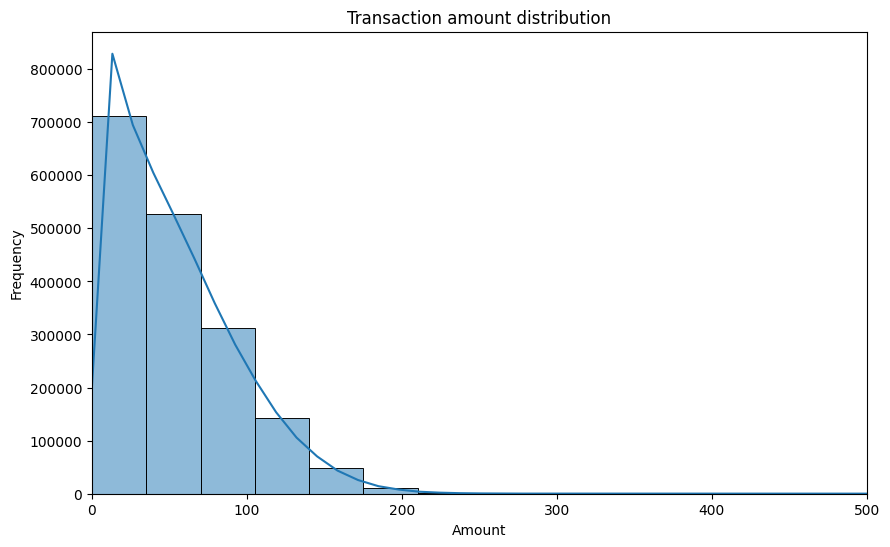

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['TX_AMOUNT'], bins=75, edgecolor='black', kde=True)
plt.xlim(0, 500)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Transaction amount distribution')
plt.show()

### Transaction Amount based feature (Scenario 1)

In [ ]:
df['IS_LARGE_AMT'] = df['TX_AMOUNT'].apply(lambda x: 1 if x>220 else 0)

### Compare fraud vs non fraud average amount

In [ ]:
# Compare mean of amount
avg_amount_by_fraud = df.groupby('TX_FRAUD')['TX_AMOUNT'].mean()
avg_amount_by_fraud

,TX_AMOUNT
TX_FRAUD,
0,52.977907
1,131.168024


### Customer Transaction Frequency in Fraud vs Non-Fraud Groups

In [ ]:
customer_trax_count = df['CUSTOMER_ID'].value_counts()

# Map the count onto the dataframe
customer_trax_count_series = df['CUSTOMER_ID'].map(customer_trax_count)

# Find mean of fraud and non fruad trax
customer_trax_count_series.groupby(df['TX_FRAUD']).mean()

,CUSTOMER_ID
TX_FRAUD,
0,471.177445
1,471.696615


Observation: Difference in average is very small -> not useful feature

### Terminal Transaction Frequency in Fraud vs Non-Fraud Groups

In [ ]:
customer_trax_count = df['TERMINAL_ID'].value_counts()

# Map the count onto the dataframe
customer_trax_count_series = df['TERMINAL_ID'].map(customer_trax_count)

# Find mean of fraud and non fruad trax
customer_trax_count_series.groupby(df['TX_FRAUD']).mean()

,TERMINAL_ID
TX_FRAUD,
0,184.151461
1,185.332471


Observation: Difference in average is very small -> not useful feature

### Terminal-Level Patterns (Scenario 2)

Count of previous transactions occured at the same terminal in last 7 days

In [ ]:
from collections import deque

# Sort the dataframe by Terminal and Date
df = df.sort_values(by=['TERMINAL_ID', 'TX_DATETIME'])

# Convert time column
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

for time_window_days in [7, 28]:

  fraud_counts = []
  fraud_rates = []

  # Process txs grouped by terminal
  for terminal_id, terminal_data in df.groupby('TERMINAL_ID'):
    terminal_data = terminal_data.sort_values(by='TX_DATETIME')

    # Initialise a deque for terminal's window
    window = deque()

    fraud_count_list = []
    fraud_rate_list = []

    for idx, row in terminal_data.iterrows():
      cur_time = row['TX_DATETIME']

      # Slide window forwards (remove old txs ie; more than 7 days before)
      while window and (cur_time - window[0][0]).days > time_window_days:
        window.popleft()

      # Count txs and frauds in current window
      frauds_in_window = sum(tx[1] for tx in window)
      total_in_window = len(window)
      fraud_rate = frauds_in_window / total_in_window if total_in_window > 0 else 0

      # Saving results of this row
      fraud_count_list.append(frauds_in_window)
      fraud_rate_list.append(fraud_rate)

      # Add this txn to the window
      window.append((cur_time, row['TX_FRAUD']))

    # Merge terminal-wise results
    fraud_counts.extend(fraud_count_list)
    fraud_rates.extend(fraud_rate_list)

  # Add new columns to dataframe
  df[f'TERMINAL_FRAUD_COUNT_{time_window_days}D'] = fraud_counts
  df[f'TERMINAL_FRAUD_RATE_{time_window_days}D'] = fraud_rates

### Customer Spending Behaviour (Scenario 3)

Count of previous transactions by the same customer in last 7 day

In [ ]:
from collections import deque

# Sort the dataframe by customer and Date
df = df.sort_values(by=['CUSTOMER_ID', 'TX_DATETIME'])

# Convert time column
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

for time_window_days in [7, 14]:

  fraud_counts = []
  fraud_rates = []

  # Process txs grouped by customer
  for customer_id, customer_data in df.groupby('CUSTOMER_ID'):
    customer_data = customer_data.sort_values(by='TX_DATETIME')

    # Initialise a deque for customer's window
    window = deque()

    fraud_count_list = []
    fraud_rate_list = []

    for idx, row in customer_data.iterrows():
      cur_time = row['TX_DATETIME']

      # Slide window forwards (remove old txs ie; more than 7 days before)
      while window and (cur_time - window[0][0]).days > time_window_days:
        window.popleft()

      # Count txs and frauds in current window
      frauds_in_window = sum(tx[1] for tx in window)
      total_in_window = len(window)
      fraud_rate = frauds_in_window / total_in_window if total_in_window > 0 else 0

      # Saving results of this row
      fraud_count_list.append(frauds_in_window)
      fraud_rate_list.append(fraud_rate)

      # Add this txn to the window
      window.append((cur_time, row['TX_FRAUD']))

    # Merge customer-wise results
    fraud_counts.extend(fraud_count_list)
    fraud_rates.extend(fraud_rate_list)

  # Add new columns to dataframe
  df[f'CUSTOMER_FRAUD_COUNT_{time_window_days}D'] = fraud_counts
  df[f'CUSTOMER_FRAUD_RATE_{time_window_days}D'] = fraud_rates

Spending behaviour deviation features

In [ ]:
df = df.sort_values(['CUSTOMER_ID', 'TX_TIME_DAYS'])

# Calculate 7 days rolling average amount of each customer's txn
df['CUSTOMER_AVG_AMOUNT_7D'] = (
    df
    .groupby('CUSTOMER_ID')['TX_AMOUNT']
    .transform(lambda x: x.shift().rolling(7, min_periods=1).mean())
)

# Ratio of current amount to average
df['CUSTOMER_AVG_AMOUNT_7D'] = df['CUSTOMER_AVG_AMOUNT_7D'].fillna(df['TX_AMOUNT'])
df['CUSTOMER_AVG_AMOUNT_RATIO'] = df['TX_AMOUNT'] / (df['CUSTOMER_AVG_AMOUNT_7D'] + 1e-6)

# Flag suspicious spikes
df['IS_SPIKE_SPENDING'] = (df['CUSTOMER_AVG_AMOUNT_RATIO'] > 4).astype(int)
df[df['IS_SPIKE_SPENDING'] == 1]['TX_FRAUD'].value_counts()

,count
TX_FRAUD,
1,1028
0,508


## Checking Time Based Patterns

### Checking fraud patterns during specific hour of day

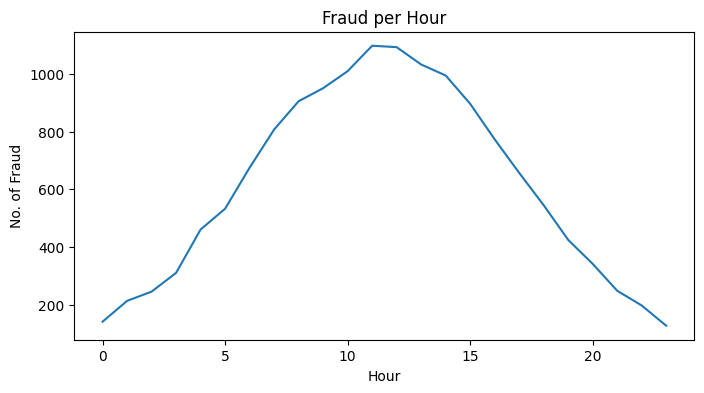

In [ ]:
# Extracting night hours
df['HOUR'] = df['TX_DATETIME'].dt.hour

fraud_per_hour = df[df['TX_FRAUD'] == 1].groupby('HOUR').size()

# Plot between hour and fraud count
plt.figure(figsize=(8,4))
plt.plot(fraud_per_hour.index, fraud_per_hour.values)
plt.xlabel('Hour')
plt.ylabel('No. of Fraud')
plt.title('Fraud per Hour')
plt.show()

Observation:

1.   Frauds peak between hours 10 and 15
2.   Fraudsters maybe mimicking normal txn hours to blend in



### Creating custom time blocks for different times of the day

In [ ]:
df['IS_MORNING'] = df['HOUR'].apply(lambda x: 1 if x >= 6 and x < 12 else 0)
df['IS_AFTERNOON'] = df['HOUR'].apply(lambda x: 1 if x >= 12 and x < 17 else 0)
df['IS_EVENING'] = df['HOUR'].apply(lambda x: 1 if x >= 17 and x <= 21 else 0)
df['IS_NIGHT'] = df['HOUR'].apply(lambda x: 1 if x >= 21 and x < 6 else 0)
df['IS_PEAK_HOUT'] = df['HOUR'].apply(lambda x: 1 if x >= 10 and x <= 15 else 0)

### Checking fraud patterns for speicfic day of the week

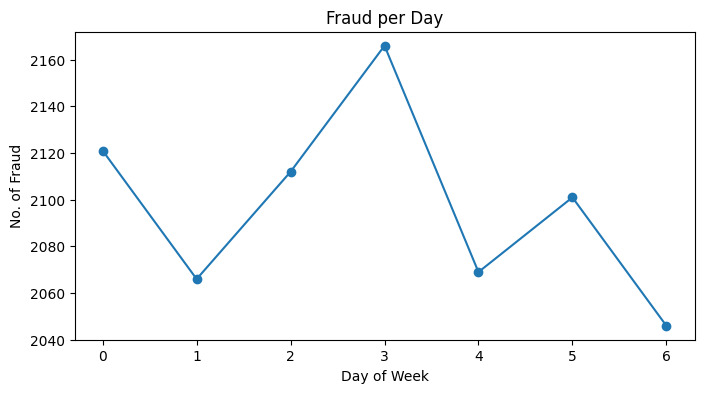

In [ ]:
# Extract day name
df['DAY_OF_WEEK'] = df['TX_DATETIME'].dt.dayofweek

fraud_per_day = df[df['TX_FRAUD'] == 1].groupby('DAY_OF_WEEK', observed=True).size()

# Plot between day and fraud count
plt.figure(figsize=(8,4))
plt.plot(fraud_per_day.index, fraud_per_day.values, marker='o')
plt.xlabel('Day of Week')
plt.ylabel('No. of Fraud')
plt.title('Fraud per Day')
plt.show()



Observations:


1.   No specific pattern differentiating weekdays/weekends
2.   No useful features to add



# Features of the Dataframe

In [ ]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'IS_LARGE_AMT', 'TERMINAL_FRAUD_COUNT_7D',
       'TERMINAL_FRAUD_RATE_7D', 'TERMINAL_FRAUD_COUNT_28D',
       'TERMINAL_FRAUD_RATE_28D', 'CUSTOMER_FRAUD_COUNT_7D',
       'CUSTOMER_FRAUD_RATE_7D', 'CUSTOMER_FRAUD_COUNT_14D',
       'CUSTOMER_FRAUD_RATE_14D', 'CUSTOMER_AVG_AMOUNT_7D',
       'CUSTOMER_AVG_AMOUNT_RATIO', 'IS_SPIKE_SPENDING', 'HOUR', 'IS_MORNING',
       'IS_AFTERNOON', 'IS_EVENING', 'IS_NIGHT', 'IS_PEAK_HOUT',
       'DAY_OF_WEEK'],
      dtype='object')

# Model Training and Evaluation

Feature Target Initialisation

In [ ]:
X = df.drop(columns=['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID','TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TX_TIME_SECONDS'])
y = df['TX_FRAUD']

X['TX_TIME_DAYS'] = X['TX_TIME_DAYS'].astype(int)

Time-based Train-Test Split

In [ ]:
df = df.sort_values('TX_DATETIME')

# Index for 70% split
split_index = int(0.7 * len(df))

# Splitting of dataset
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

Handle Class Imbalance

In [ ]:
from collections import Counter

# Count of fraud and legit txns
count = Counter(y_train)

scale_pos_weight = count[0] / count[1]
print('scale_pos_weight : ', scale_pos_weight)

scale_pos_weight :  116.15561492224025


In [ ]:
len(X_train)

1227908

In [ ]:
from xgboost import XGBClassifier

model_default = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    # use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_default.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_default.predict(X_test)

# Evaluation of model
print('CLASSIFICATION REPORT\n',classification_report(y_test, y_pred))
print('CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    522047
           1       0.33      0.94      0.49      4200

    accuracy                           0.98    526247
   macro avg       0.67      0.96      0.74    526247
weighted avg       0.99      0.98      0.99    526247

CONFUSION MATRIX
 [[514132   7915]
 [   247   3953]]


# Feature Importance

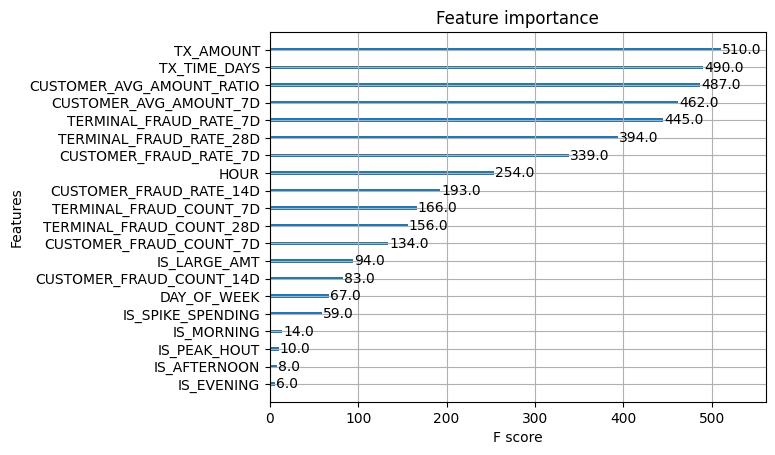

In [ ]:
import xgboost as xgb

xgb.plot_importance(model_default)
plt.show()

# Training Model with Important Features only

Feature-Target Initialisation (removing less important features)

In [ ]:
X = df.drop(columns=['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID','TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TX_TIME_SECONDS', 'IS_MORNING', 'IS_PEAK_HOUT', 'IS_AFTERNOON', 'IS_EVENING'])
y = df['TX_FRAUD']

X['TX_TIME_DAYS'] = X['TX_TIME_DAYS'].astype(int)

Time-based Train-Test Split

In [ ]:
df = df.sort_values('TX_DATETIME')

# Index for 70% split
split_index = int(0.7 * len(df))

# Splitting of dataset
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

Handle Class Imbalance

In [ ]:
from collections import Counter

# Count of fraud and legit txns
count = Counter(y_train)

scale_pos_weight = count[0] / count[1]
print('scale_pos_weight : ', scale_pos_weight)

scale_pos_weight :  121.83993597438976


In [ ]:
from xgboost import XGBClassifier

model_best_feats = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    # use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_best_feats.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_best_feats.predict(X_test)

# Evaluation of model
print('CLASSIFICATION REPORT\n',classification_report(y_test, y_pred))
print('CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    521562
           1       0.41      0.93      0.57      4685

    accuracy                           0.99    526247
   macro avg       0.70      0.96      0.78    526247
weighted avg       0.99      0.99      0.99    526247

CONFUSION MATRIX
 [[515211   6351]
 [   306   4379]]


# Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [3, 5, 7, 9],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'subsample' : [0.6, 0.8, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0],
    'gamma' : [0, 0.1, 0.3, 0.5],
    'reg_alpha' : [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

Set up RandomisedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.5, 1.0, 1.5, 2.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

Best Parameters

In [ ]:
random_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.5,
 'reg_alpha': 1,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 1.0}

Prediction and Evaluation using best model

In [ ]:
xgb_tuned = random_search.best_estimator_

y_pred = xgb_tuned.predict(X_test)

# Evaluation of model
print('CLASSIFICATION REPORT\n',classification_report(y_test, y_pred))
print('CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    521562
           1       0.26      0.95      0.40      4685

    accuracy                           0.97    526247
   macro avg       0.63      0.96      0.70    526247
weighted avg       0.99      0.97      0.98    526247

CONFUSION MATRIX
 [[508587  12975]
 [   217   4468]]


# Threshold Tuning

In [ ]:
import numpy as np

# Get predicted probabilities
y_proba = model_best_feats.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)

Evaluation of model with each threshold

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

for t in thresholds:
  y_pred_thresh = (y_proba >= t).astype(int)
  precision = precision_score(y_test, y_pred_thresh)
  recall = recall_score(y_test, y_pred_thresh)
  f1 = f1_score(y_test, y_pred_thresh)
  print(f'Threshold: {t:.2f} | Precision: {precision:.4f} | Recall: {recall:.4f} | f1: {f1:.4f}')

Threshold: 0.10 | Precision: 0.1213 | Recall: 0.9673 | f1: 0.2155
Threshold: 0.15 | Precision: 0.1535 | Recall: 0.9644 | f1: 0.2648
Threshold: 0.20 | Precision: 0.1856 | Recall: 0.9597 | f1: 0.3110
Threshold: 0.25 | Precision: 0.2184 | Recall: 0.9558 | f1: 0.3556
Threshold: 0.30 | Precision: 0.2538 | Recall: 0.9526 | f1: 0.4008
Threshold: 0.35 | Precision: 0.2895 | Recall: 0.9490 | f1: 0.4437
Threshold: 0.40 | Precision: 0.3289 | Recall: 0.9434 | f1: 0.4878
Threshold: 0.45 | Precision: 0.3687 | Recall: 0.9383 | f1: 0.5294
Threshold: 0.50 | Precision: 0.4081 | Recall: 0.9347 | f1: 0.5681
Threshold: 0.55 | Precision: 0.4532 | Recall: 0.9300 | f1: 0.6095
Threshold: 0.60 | Precision: 0.5006 | Recall: 0.9240 | f1: 0.6494
Threshold: 0.65 | Precision: 0.5491 | Recall: 0.9197 | f1: 0.6877
Threshold: 0.70 | Precision: 0.5988 | Recall: 0.9136 | f1: 0.7234
Threshold: 0.75 | Precision: 0.6563 | Recall: 0.9069 | f1: 0.7615
Threshold: 0.80 | Precision: 0.7215 | Recall: 0.9001 | f1: 0.8009
Threshold:

Make final predictions with the chosen threshold

---


Here, balanced system was preferred, chose threshold with best f1 score

In [ ]:
best_thresh = 0.85

# Make predictions using the best threshold
y_pred_final = (y_proba >= best_thresh).astype(int)

# Evaluate the model
print('CLASSIFICATION REPORT\n',classification_report(y_test, y_pred_final))
print('CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred_final))

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    521562
           1       0.78      0.89      0.83      4685

    accuracy                           1.00    526247
   macro avg       0.89      0.95      0.92    526247
weighted avg       1.00      1.00      1.00    526247

CONFUSION MATRIX
 [[520395   1167]
 [   492   4193]]


> **Model trained excluding less important features (model_best_feats) threshold tuned with threshold = 0.85 is concluded to be the best model**



# Save the Model

Choose the final model to save

In [ ]:
model_final = model_best_feats

In [ ]:
import joblib

model_path = '/content/drive/MyDrive/Unified_Mentor_Projects/Fraud_Detection/xgboost_fraud_detection_model.pkl'
joblib.dump(model_final, model_path)

['/content/drive/MyDrive/Unified_Mentor_Projects/Fraud_Detection/xgboost_fraud_detection_model.pkl']